In [1]:
import pandas as pd
import numpy as np
import feature_extraction_ML as fe
from data_loader_ML import DataLoaderML
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
data = DataLoaderML()
data.get_audios(fullDataset = True)

In [21]:
data.audios

,Patient_ID,AV,MV,PV,TV,MURMUR
0,2530,"[-0.011331763, -0.0063461154, 0.0008841861, 0....","[0.36723548, 0.39998227, 0.4128391, 0.4063368,...","[0.07548434, 0.08113554, 0.08231447, 0.0793684...","[0.06667692, 0.07404709, 0.07828741, 0.0795538...",Absent
1,9979,"[0.04911021, 0.06300914, 0.07732098, 0.0912046...","[0.14847445, 0.16823082, 0.18181917, 0.1891644...","[0.94922936, 1.0470796, 1.0954523, 1.0936234, ...","[0.013476763, 0.01739587, 0.013739649, -0.0018...",Present
2,9983,"[0.027557356, 0.031606995, 0.03487075, 0.03744...","[-0.02313522, -0.02673009, -0.02906448, -0.029...","[0.100047894, 0.08930685, 0.06477623, 0.027554...","[0.025206711, 0.026646812, 0.026619088, 0.0253...",Unknown
3,13918,"[0.0004159419, 0.0008962695, 0.0011781004, 0.0...","[-0.0535802, -0.060866673, -0.065505505, -0.06...","[0.6047976, 0.6647704, 0.6936066, 0.6913765, 0...","[-0.002155952, -0.00087783893, 0.0010613764, 0...",Present
4,14241,"[0.006493539, 0.0065751434, 0.0059580943, 0.00...","[0.07059953, 0.07696698, 0.07921517, 0.0774918...","[-0.038830675, -0.03927154, -0.036940027, -0.0...","[0.023087388, 0.026930997, 0.030365026, 0.0336...",Present
...,...,...,...,...,...,...
937,85340,"[0.1679408, 0.18707043, 0.19415374, 0.18804699...","[0.009680796, 0.011671027, 0.013032296, 0.0135...","[-0.19644624, -0.22403994, -0.24240012, -0.250...","[0.003284532, 0.002875427, 0.002163854, 0.0011...",Absent
938,85341,"[-0.09337107, -0.026182987, 0.06578951, 0.1730...","[0.10981277, 0.115506835, 0.112576194, 0.10106...","[0.042366326, 0.04265387, 0.038385164, 0.02979...","[-0.13252929, -0.14456213, -0.1472369, -0.1401...",Absent
939,85343,"[0.012957233, 0.016487204, 0.019973602, 0.0230...","[-0.09863811, -0.08068446, -0.050032195, -0.01...","[-0.0023010615, -0.0017294218, -0.0008662953, ...","[-0.020847958, -0.026429573, -0.031285137, -0....",Present
940,85345,"[0.037634924, 0.04447094, 0.050395332, 0.05513...",None,"[-0.0056456323, -0.0006415307, 0.0059839287, 0...",None,Absent


In [22]:
data.audios.isna().sum() # number of None values per area

Patient_ID      0
AV            155
MV             93
PV            180
TV            222
MURMUR          0
dtype: int64

In [23]:
df = data.audios.dropna()

In [24]:
df.head(5)

,Patient_ID,AV,MV,PV,TV,MURMUR
0,2530,"[-0.011331763, -0.0063461154, 0.0008841861, 0....","[0.36723548, 0.39998227, 0.4128391, 0.4063368,...","[0.07548434, 0.08113554, 0.08231447, 0.0793684...","[0.06667692, 0.07404709, 0.07828741, 0.0795538...",Absent
1,9979,"[0.04911021, 0.06300914, 0.07732098, 0.0912046...","[0.14847445, 0.16823082, 0.18181917, 0.1891644...","[0.94922936, 1.0470796, 1.0954523, 1.0936234, ...","[0.013476763, 0.01739587, 0.013739649, -0.0018...",Present
2,9983,"[0.027557356, 0.031606995, 0.03487075, 0.03744...","[-0.02313522, -0.02673009, -0.02906448, -0.029...","[0.100047894, 0.08930685, 0.06477623, 0.027554...","[0.025206711, 0.026646812, 0.026619088, 0.0253...",Unknown
3,13918,"[0.0004159419, 0.0008962695, 0.0011781004, 0.0...","[-0.0535802, -0.060866673, -0.065505505, -0.06...","[0.6047976, 0.6647704, 0.6936066, 0.6913765, 0...","[-0.002155952, -0.00087783893, 0.0010613764, 0...",Present
4,14241,"[0.006493539, 0.0065751434, 0.0059580943, 0.00...","[0.07059953, 0.07696698, 0.07921517, 0.0774918...","[-0.038830675, -0.03927154, -0.036940027, -0.0...","[0.023087388, 0.026930997, 0.030365026, 0.0336...",Present


In [25]:
print(f'There are {df.shape[0]} training samples with no missing value in the 4 areas')

There are 587 training samples with no missing value in the 4 areas


In [26]:
df.groupby('MURMUR').count()['Patient_ID']

MURMUR
Absent     457
Present    117
Unknown     13
Name: Patient_ID, dtype: int64

In [27]:
df = df[df.MURMUR != 'Unknown']
#set audio signal length
df = fe.set_len_extr(df,sec=5,augment=True)

# stat ae
fe.stat_amplitude_envelope_extr(df, np.mean, "mean")
fe.stat_amplitude_envelope_extr(df, np.median, "median")
fe.stat_amplitude_envelope_extr(df, np.std, "std")
print("AE finished")
# perc ae
fe.stat_amplitude_envelope_perc_extr(df, percentile=75)
# stat rms
fe.stat_rms_extr(df, np.mean, "mean")
fe.stat_rms_extr(df, np.median, "median")
fe.stat_rms_extr(df, np.std, "std")
print("rms finished")
# perc rms
fe.stat_rms_perc_extr(df, percentile=75)
# max mag freq
fe.max_frequency_extr(df)
fe.total_energy_extr(df)

# ZCR
fe.zero_crossing_rate_extr(df)

# onset detection
fe.onset_detection_extr(df)

# skewness and kurtosis
fe.skewness_extr(df)
fe.kurtosis_extr(df)

# Band Energy Ratio
fe.band_energy_ratio_extr(df, np.mean, "mean", 2000)
fe.band_energy_ratio_extr(df, np.std, "std", 2000)
print("BER finished")


# Spectral centroid
fe.spectral_centroid_extr(df, np.mean, "mean")
# Bandwidth
fe.spectral_bandwidth_extr(df,  np.mean, "mean")
# Autocorrelation
fe.autocorrelation_extr(df,  np.mean, "mean")
print("autocor finished")

# MFCC's
fe.mfccs_extr(df)

Number of patient augmented 92.0 | new samples: 184
AE finished
rms finished
BER finished
autocor finished


In [28]:
df.groupby('MURMUR').count()['Patient_ID']

MURMUR
Absent     457
Present    301
Name: Patient_ID, dtype: int64

In [29]:
df.to_csv('murmor_dataset.csv', index=False)

# Important Features Demonstration

In [9]:
import librosa

In [6]:
data = DataLoaderML()
data.get_audios(fullDataset = False)

Please wait. Out of 942 patient audios,
0 patient audios have been loaded
10 patient audios have been loaded


In [7]:
data = data.audios
data

,Patient_ID,AV,MV,PV,TV,MURMUR
0,2530,"[-0.011331763, -0.0063461154, 0.0008841861, 0....","[0.36723548, 0.39998227, 0.4128391, 0.4063368,...","[0.07548434, 0.08113554, 0.08231447, 0.0793684...","[0.06667692, 0.07404709, 0.07828741, 0.0795538...",Absent
1,9979,"[0.04911021, 0.06300914, 0.07732098, 0.0912046...","[0.14847445, 0.16823082, 0.18181917, 0.1891644...","[0.94922936, 1.0470796, 1.0954523, 1.0936234, ...","[0.013476763, 0.01739587, 0.013739649, -0.0018...",Present
2,9983,"[0.027557356, 0.031606995, 0.03487075, 0.03744...","[-0.02313522, -0.02673009, -0.02906448, -0.029...","[0.100047894, 0.08930685, 0.06477623, 0.027554...","[0.025206711, 0.026646812, 0.026619088, 0.0253...",Unknown
3,13918,"[0.0004159419, 0.0008962695, 0.0011781004, 0.0...","[-0.0535802, -0.060866673, -0.065505505, -0.06...","[0.6047976, 0.6647704, 0.6936066, 0.6913765, 0...","[-0.002155952, -0.00087783893, 0.0010613764, 0...",Present
4,14241,"[0.006493539, 0.0065751434, 0.0059580943, 0.00...","[0.07059953, 0.07696698, 0.07921517, 0.0774918...","[-0.038830675, -0.03927154, -0.036940027, -0.0...","[0.023087388, 0.026930997, 0.030365026, 0.0336...",Present
5,14998,"[0.18650353, 0.20451608, 0.2070004, 0.19213542...","[0.003019041, 0.0046704146, 0.0064322776, 0.00...","[0.00786276, 0.011232967, 0.014208761, 0.01620...","[-0.0084971655, -0.009817731, -0.010633876, -0...",Absent
6,23625,"[0.0073306933, 0.005942596, 0.003964544, 0.001...","[0.043617964, 0.04564083, 0.044442482, 0.04025...","[-0.273885, -0.30803826, -0.33009908, -0.33933...","[0.0015053503, 0.0013998933, 0.0011277263, 0.0...",Absent
7,24160,"[0.025746454, 0.02780911, 0.028367158, 0.02750...","[-0.0061448854, -0.0071288254, -0.0076846816, ...","[-0.025995228, -0.021946335, -0.014136325, -0....","[-0.96016484, -1.0620905, -1.1174103, -1.12844...",Absent
8,29045,"[-0.042356454, -0.04657941, -0.048419602, -0.0...","[0.004051143, 0.006092557, 0.008459051, 0.0110...","[-0.0011566154, -0.0006544603, 0.00022330925, ...","[-0.18107, -0.18800947, -0.18215847, -0.164884...",Present
9,29378,"[0.0067281146, 0.009251771, 0.009729665, 0.005...","[0.027949857, 0.033777047, 0.038583465, 0.0417...",None,None,Unknown


In [50]:
import matplotlib.pyplot as plt
import librosa.display

In [109]:
sample_present = data[data.Patient_ID == 29045 ]['AV'].to_numpy()[0]
sample_absent = data[data.Patient_ID == 39043 ]['AV'].to_numpy()[0]

sample_present = sample_present[:sample_absent.shape[0]]

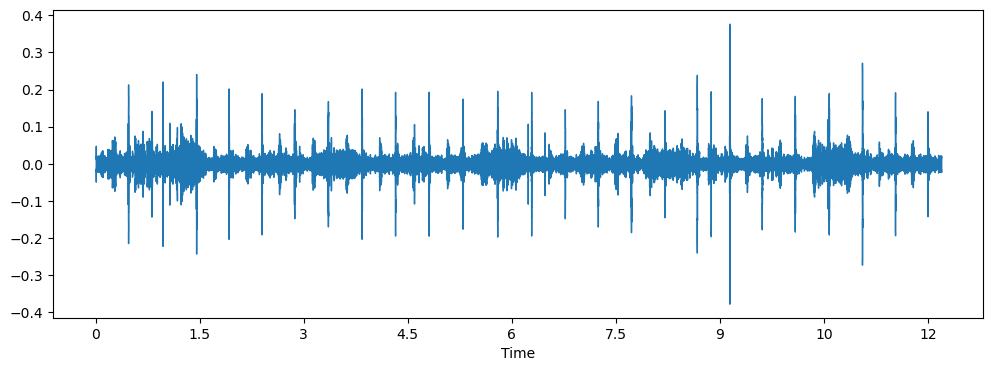

In [110]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(sample_present)

# Zero Crossing Rate 

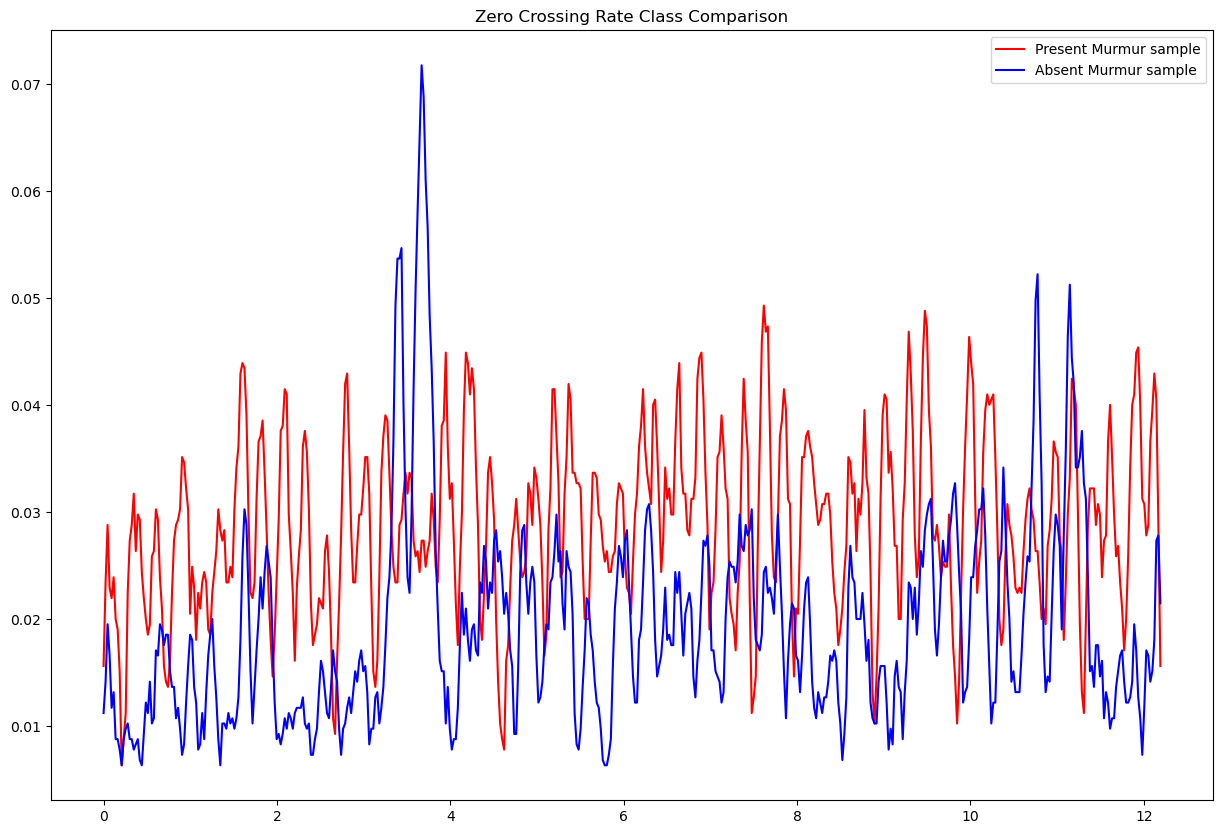

In [111]:
zcr_present = librosa.feature.zero_crossing_rate(sample_present, frame_length=2048, hop_length=512)[0]
zcr_absent = librosa.feature.zero_crossing_rate(sample_absent, frame_length=2048, hop_length=512)[0]

frames = range(len(zcr_present))
t = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(15, 10))

plt.plot(t, zcr_present, color="r", label = "Present Murmur sample")
plt.plot(t, zcr_absent, color="b", label = "Absent Murmur sample")
plt.title('Zero Crossing Rate Class Comparison')
plt.legend()
plt.show()

# Onset detection

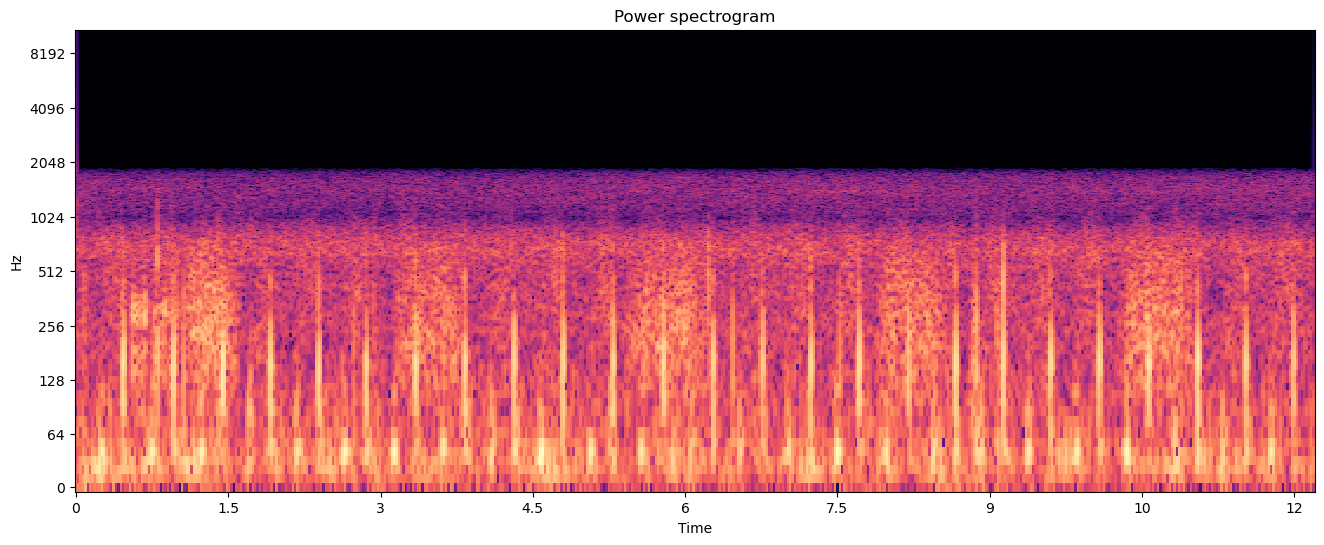

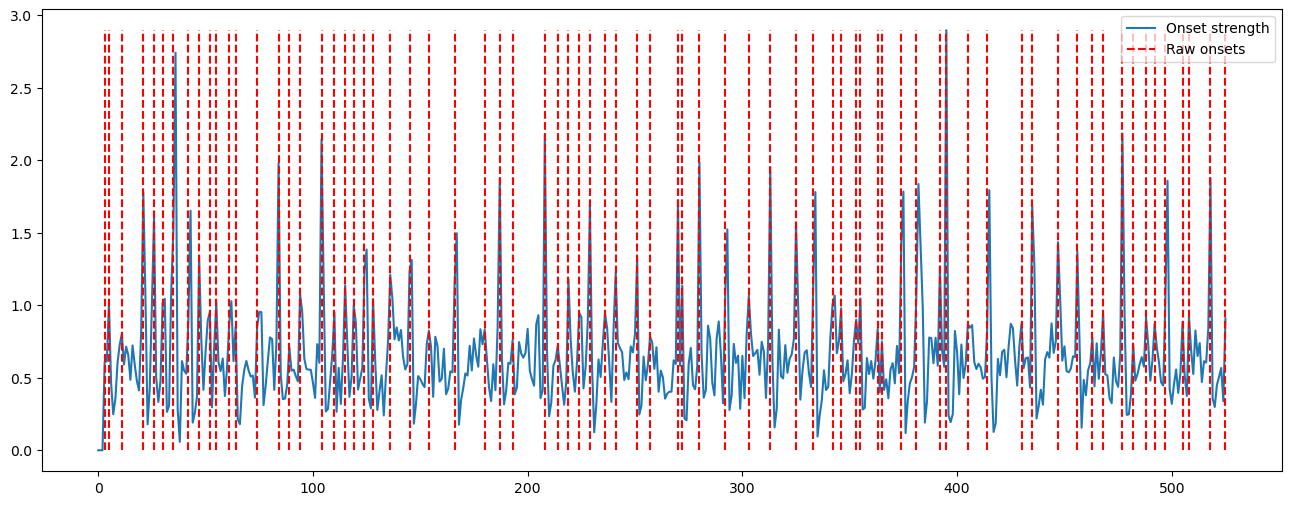

In [112]:

# use a pre-computed onset envelope
o_env = librosa.onset.onset_strength(sample_present)
onset_frames = librosa.onset.onset_detect(sample_present, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_times = librosa.frames_to_time(onset_frames)


# visualize it
D = np.abs(librosa.stft(sample_present))
plt.figure(figsize=(16, 6))

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')



oenv = librosa.onset.onset_strength(y=sample_present)
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)

# Plot the results
plt.figure(figsize=(16, 6))

plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets', color='r',linestyle='--')
plt.legend(frameon=True, framealpha=0.75)



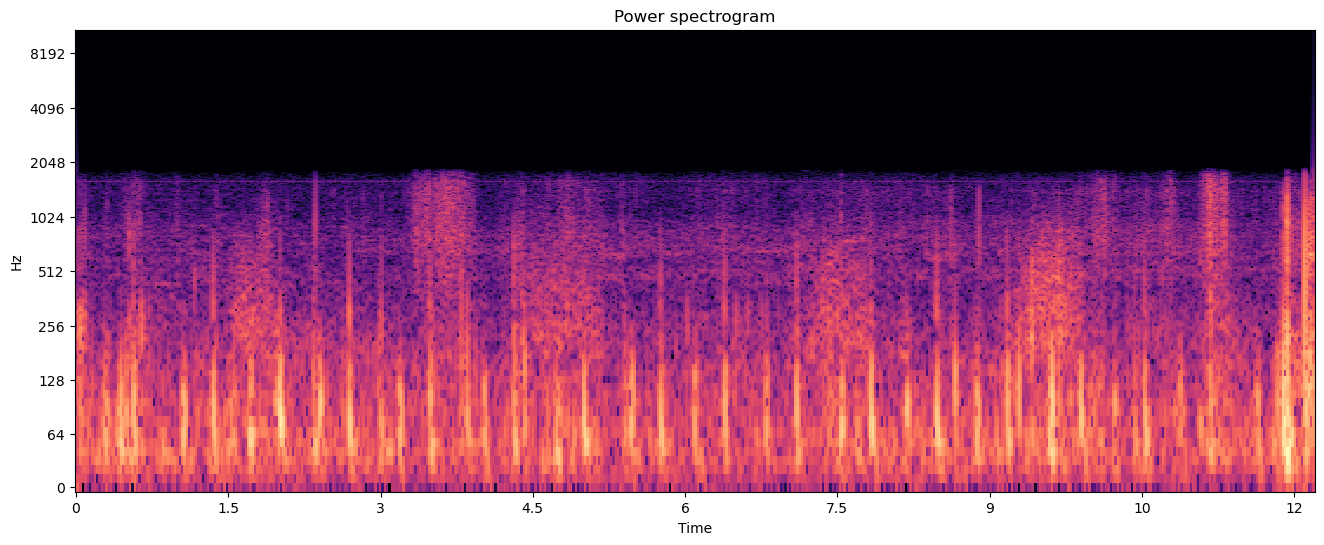

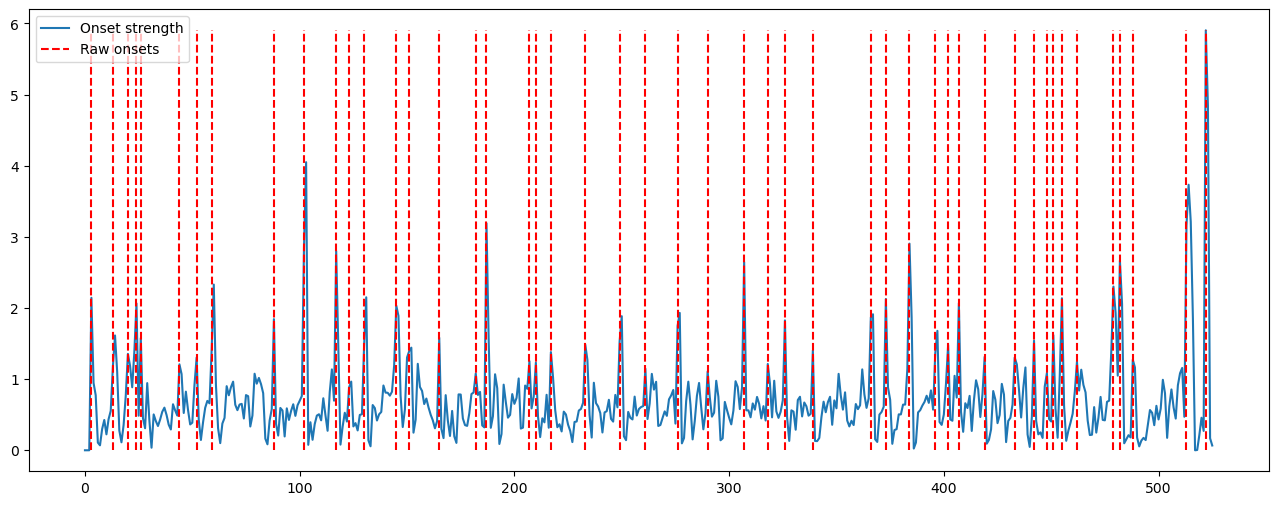

In [113]:

# use a pre-computed onset envelope
o_env = librosa.onset.onset_strength(sample_absent)
onset_frames = librosa.onset.onset_detect(sample_absent, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_times = librosa.frames_to_time(onset_frames)


# visualize it
D = np.abs(librosa.stft(sample_absent))
plt.figure(figsize=(16, 6))

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')



oenv = librosa.onset.onset_strength(y=sample_absent)
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)

# Plot the results
plt.figure(figsize=(16, 6))

plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets', color='r',linestyle='--')
plt.legend(frameon=True, framealpha=0.75)

# MFCCs

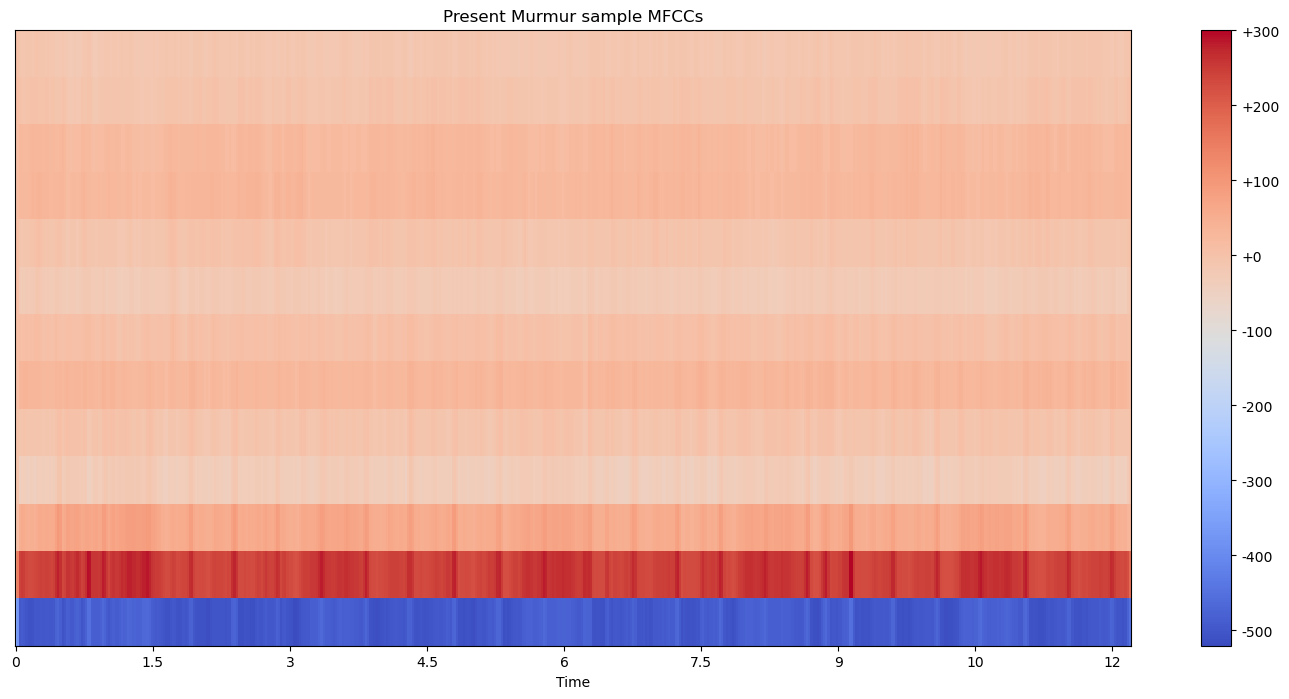

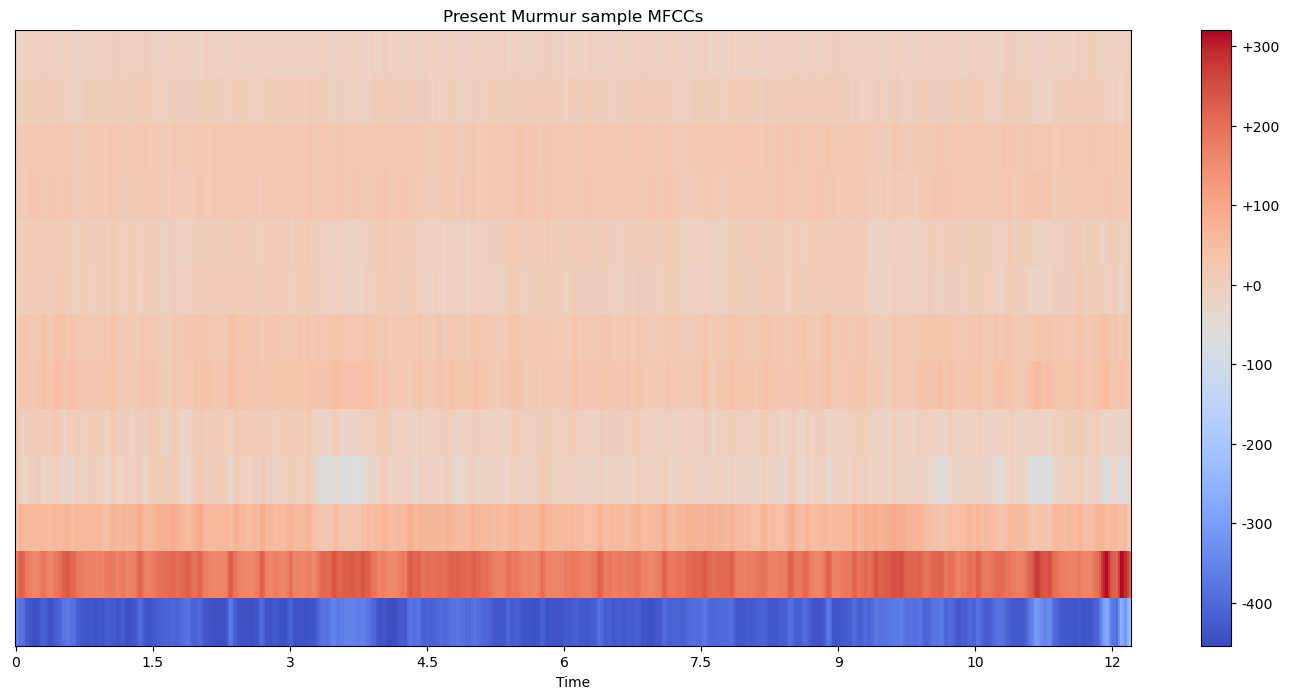

In [118]:
mfccs = librosa.feature.mfcc(y=sample_present, n_mfcc=13)

plt.figure(figsize=(18, 8))
librosa.display.specshow(mfccs, 
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.title("Present Murmur sample MFCCs")
plt.show()

mfccs = librosa.feature.mfcc(y=sample_absent, n_mfcc=13)

plt.figure(figsize=(18, 8))
librosa.display.specshow(mfccs, 
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.title("Present Murmur sample MFCCs")
plt.show()

# Band Energy Ratio

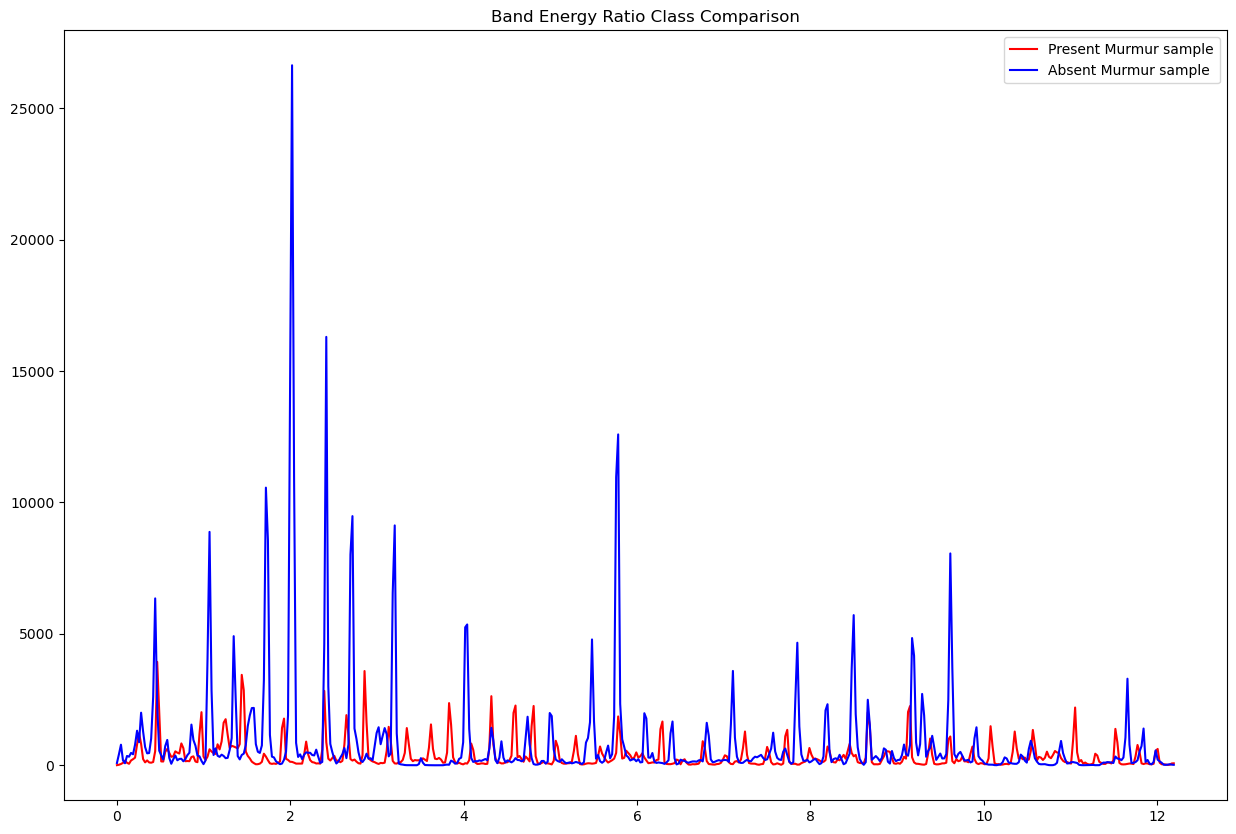

In [121]:
ber_present = fe.band_energy_ratio(sample_present,split_frequency = 2000)
ber_absent = fe.band_energy_ratio(sample_absent,split_frequency = 2000)

frames = range(len(zcr_present))
t = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(15, 10))

plt.plot(t, ber_present, color="r", label = "Present Murmur sample")
plt.plot(t, ber_absent, color="b", label = "Absent Murmur sample")
plt.title('Band Energy Ratio Class Comparison')
plt.legend()
plt.show()

# Spectral Centroid

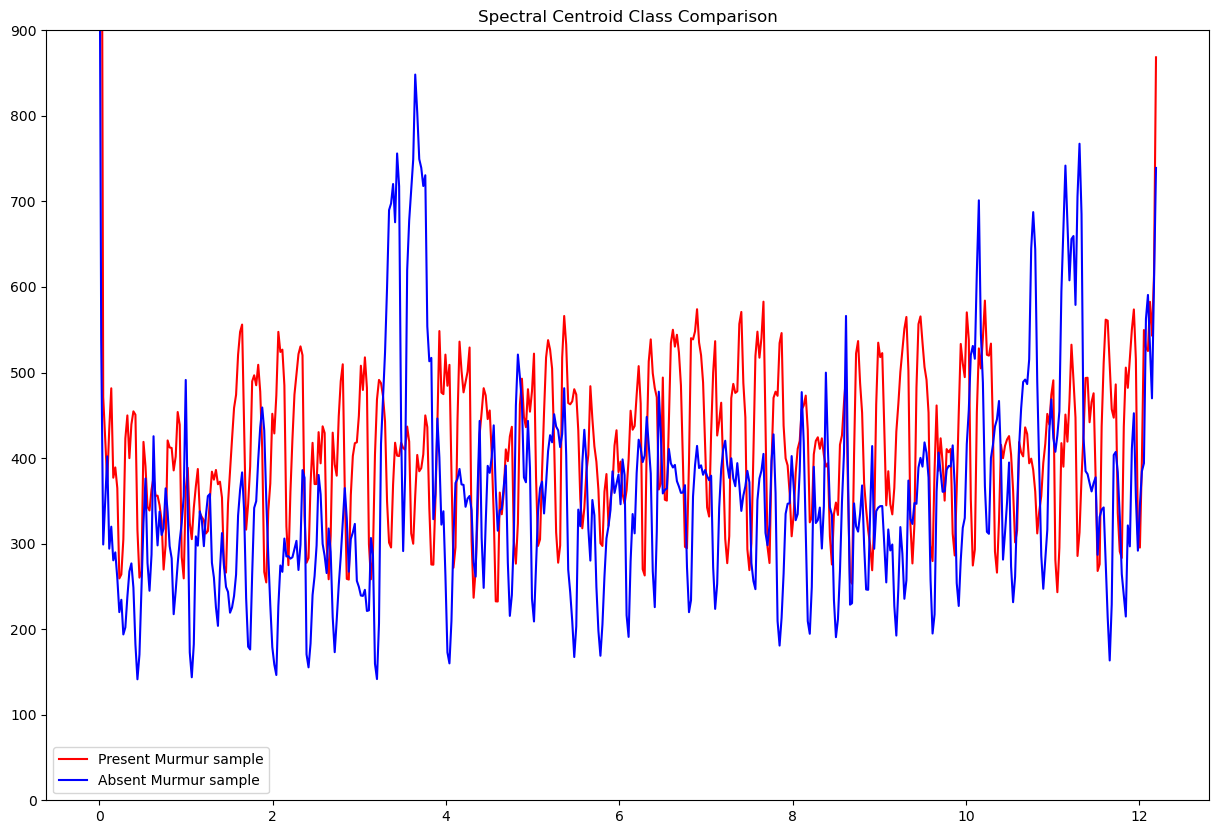

In [125]:
sc_present = librosa.feature.spectral_centroid(y=sample_present, n_fft=2048, hop_length=512)[0]
sc_absent = librosa.feature.spectral_centroid(y=sample_absent, n_fft=2048, hop_length=512)[0]


frames = range(len(zcr_present))
t = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(15, 10))

plt.plot(t, sc_present, color="r", label = "Present Murmur sample")
plt.plot(t, sc_absent, color="b", label = "Absent Murmur sample")
plt.title('Spectral Centroid Class Comparison')
plt.ylim(0,900)
plt.legend()
plt.show()